In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-data/ipl_2019.xlsx


In [46]:
df = pd.read_excel('/kaggle/input/ipl-data/ipl_2019.xlsx')

In [47]:
df.head()

,Id,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
0,1,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875
1,2,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500
2,3,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430
3,4,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375
4,5,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813


In [48]:
df.shape

(70, 11)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        70 non-null     int64  
 1   Player    70 non-null     object 
 2   Team      70 non-null     object 
 3   Runs      70 non-null     int64  
 4   Avg       70 non-null     float64
 5   SR        70 non-null     float64
 6   Hundreds  70 non-null     int64  
 7   Fifties   70 non-null     int64  
 8   Fours     70 non-null     int64  
 9   Sixes     70 non-null     int64  
 10  Salary    70 non-null     float64
dtypes: float64(3), int64(6), object(2)
memory usage: 6.1+ KB


In [50]:
df.isnull().sum()

Id          0
Player      0
Team        0
Runs        0
Avg         0
SR          0
Hundreds    0
Fifties     0
Fours       0
Sixes       0
Salary      0
dtype: int64

In [51]:
df.describe()

,Id,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,37.428571,249.257143,28.579429,133.116714,0.085714,1.485714,22.400000,10.514286,0.912016
std,23.352107,168.748135,14.891400,25.182283,0.281963,1.734082,16.844902,9.571611,0.671369
min,1.000000,12.000000,3.600000,63.150000,0.000000,0.000000,1.000000,0.000000,0.028600
25%,18.250000,96.500000,18.000000,120.640000,0.000000,0.000000,8.000000,4.000000,0.321663
50%,35.500000,216.500000,27.070000,133.310000,0.000000,1.000000,19.000000,8.000000,0.700900
75%,54.250000,395.250000,35.162500,148.472500,0.000000,3.000000,36.750000,14.000000,1.328130
max,92.000000,692.000000,83.200000,204.810000,1.000000,8.000000,64.000000,52.000000,2.656250


# Data Preprocessing

In [52]:
df.columns

Index(['Id', 'Player', 'Team', 'Runs', 'Avg', 'SR', 'Hundreds', 'Fifties',
       'Fours', 'Sixes', 'Salary '],
      dtype='object')

In [53]:
# Including parameters represnting players performance excluding No of Hundreds
selected_columns_df = df[['Runs', 'Avg', 'SR', 'Fifties','Fours', 'Sixes']]

In [54]:
selected_columns_df.head()

,Runs,Avg,SR,Fifties,Fours,Sixes
0,442,44.20,154.00,5,31,26
1,393,32.75,137.89,1,45,9
2,61,12.20,107.01,0,5,2
3,282,23.50,93.06,1,20,7
4,510,56.66,204.81,4,31,52


In [55]:
from sklearn import preprocessing
#Scale the data to suppress the effect of variables with higher scale / variables in different units
scaler = preprocessing.StandardScaler().fit(selected_columns_df)
scaled_df = pd.DataFrame(scaler.fit_transform(selected_columns_df),columns=selected_columns_df.columns, index=selected_columns_df.index)

In [56]:
scaled_df.head()

,Runs,Avg,SR,Fifties,Fours,Sixes
0,1.150440,1.056540,0.835273,2.041230,0.514226,1.629561
1,0.857969,0.282088,0.190918,-0.282121,1.351339,-0.159348
2,-1.123665,-1.107867,-1.044195,-0.862959,-1.040412,-0.895958
3,0.195435,-0.343561,-1.602156,-0.282121,-0.143505,-0.369808
4,1.556316,1.899306,2.867529,1.460392,0.514226,4.365540


# Clustering

In [57]:
from sklearn.cluster import KMeans

# Finding the Optimal Number of Clusters

## Elbow Plot

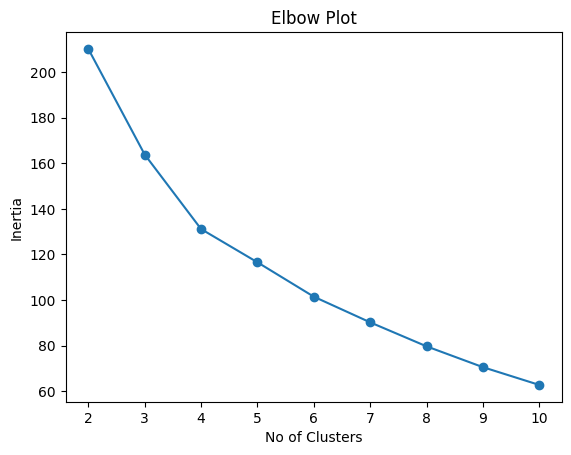

In [58]:
inertial_values = [] #sum of squared distances to the nearest centroid
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    inertial_values.append(kmeans.inertia_)

#plotiing the elbow plot
plt.plot(k_values, inertial_values, marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
silhouette_scores = []
k_values = range(2,10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette_avg)
    print('For K = ', k , 'The Silhouette Score is ',silhouette_avg)
    
    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print('==========================================================')
print('The Optimal number of cluster is : ',optimal_k)

For K =  2 The Silhouette Score is  0.4238350947698203
For K =  3 The Silhouette Score is  0.357375258174334
For K =  4 The Silhouette Score is  0.29835520402131777
For K =  5 The Silhouette Score is  0.24820068928795963
For K =  6 The Silhouette Score is  0.2813110029929633
For K =  7 The Silhouette Score is  0.2979970117067971
For K =  8 The Silhouette Score is  0.267934346467336
For K =  9 The Silhouette Score is  0.29778489959457083
The Optimal number of cluster is :  2


**Decision**

In the plot, the elbow appears to be around 4 clusters, as the slope of the curve flattens after that point. Therefore, K = 4 would be a reasonable choice for the number of clusters

# K = 4

In [61]:
k = 4
model = KMeans(n_clusters=k,random_state=10)
model.fit(scaled_df)

KMeans(n_clusters=4, random_state=10)

In [62]:
print("Cluster Labels : ",model.labels_)

Cluster Labels :  [0 3 2 2 0 2 2 2 0 3 2 2 0 1 2 1 2 3 0 2 1 0 3 2 2 2 1 0 2 1 3 1 3 1 1 0 1
 3 3 2 3 0 2 2 2 2 0 1 3 3 1 1 1 3 2 3 2 2 3 3 3 1 1 3 3 2 1 3 1 2]


In [63]:
df['cluster_id'] = model.labels_

In [64]:
df.head()

,Id,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary,cluster_id
0,1,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875,0
1,2,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500,3
2,3,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430,2
3,4,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375,2
4,5,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813,0


In [65]:
#Write the results for making interpretaions
df.to_excel('Players_Clusteredk4.xlsx',index=False)

In [66]:
# =============================================================================
# Profile Clusters K = 4
# =============================================================================
centroids=model.cluster_centers_
column_names= selected_columns_df.columns.tolist()
cluster_profile_df=pd.DataFrame(centroids,columns=column_names)
print(cluster_profile_df)

       Runs       Avg        SR   Fifties     Fours     Sixes
0  1.500807  1.591284  0.957264  1.460392  1.010515  1.840021
1 -0.430585  0.091907  0.677707 -0.555457 -0.495233 -0.177918
2 -0.934654 -0.894611 -0.840243 -0.741951 -0.888436 -0.777574
3  0.775977  0.210285 -0.048834  0.665562  1.033488  0.172957


In [67]:
#Write to an excel file for reading this
cluster_profile_df.to_excel('Players_Cluster_Profilek4.xlsx',index=True)

# ----------------------------------------------------------------------

# K = 5

In [68]:
k = 5
model2 = KMeans(n_clusters=k,random_state=10)
model2.fit(scaled_df)

KMeans(n_clusters=5, random_state=10)

In [69]:
print("Cluster Labels : ",model2.labels_)

Cluster Labels :  [0 3 4 4 0 4 4 4 0 3 4 4 0 1 4 1 4 3 0 4 2 0 3 4 4 4 1 0 4 1 3 1 3 1 2 0 1
 3 3 4 3 0 4 2 2 4 0 1 1 3 2 1 1 3 2 3 4 2 3 3 3 2 2 3 3 4 1 3 2 4]


In [70]:
df['cluster_id2'] = model2.labels_

In [71]:
df.head()

,Id,Player,Team,Runs,Avg,SR,Hundreds,Fifties,Fours,Sixes,Salary,cluster_id,cluster_id2
0,1,AB de Villiers,Royal Challengers Bangalore,442,44.20,154.00,0,5,31,26,1.71875,0,0
1,2,Ajinkya Rahane,Rajasthan Royals,393,32.75,137.89,1,1,45,9,0.62500,3,3
2,3,Akshdeep Nath,Royal Challengers Bangalore,61,12.20,107.01,0,0,5,2,0.51430,2,4
3,4,Ambati Rayudu,Chennai Super Kings,282,23.50,93.06,0,1,20,7,0.34375,2,4
4,5,Andre Russell,Kolkata Knight Riders,510,56.66,204.81,0,4,31,52,1.32813,0,0


In [72]:
#Write the results for making interpretaions
df.to_excel('Players_Clusteredk5.xlsx',index=False)

In [73]:
# =============================================================================
# Profile Clusters for K = 5
# =============================================================================
centroids=model2.cluster_centers_
column_names= selected_columns_df.columns.tolist()
cluster_profile2_df=pd.DataFrame(centroids,columns=column_names)
print(cluster_profile2_df)

       Runs       Avg        SR   Fifties     Fours     Sixes
0  1.500807  1.591284  0.957264  1.460392  1.010515  1.840021
1 -0.136330  0.352375  0.245547 -0.427331 -0.302955  0.051112
2 -1.017421 -0.713133  0.935305 -0.804875 -0.890927 -0.674975
3  0.808230  0.211632 -0.011512  0.718211  1.072302  0.185572
4 -0.887302 -0.840969 -1.083252 -0.717750 -0.843092 -0.780205


In [74]:
#Write to an excel file for reading this
cluster_profile2_df.to_excel('Players_Cluster_Profilek5.xlsx',index=True)